In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 데이터 준비
* sklearn에서 제공하는 샘플 데이터 활용

In [2]:
from sklearn.datasets import load_iris 
iris = load_iris() 
# print('data:', iris.data)
# print('data:', iris.feature_names)
# print('data:', iris.target)
# print('data:', iris.target_names)

df_iris = pd.DataFrame(iris.data,
             columns = iris.feature_names)
df_iris["species"] = iris.target
df_iris.head(3)


# df_iris["species"] = df_iris["species"].map(dict(zip([0,1,2], iris.target_names)))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0



#### 데이터 탐색

In [3]:
# -----------------------------------
# 종속변수 빈도수 확인
#   불균형 여부 확인
# -----------------------------------

df_iris['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

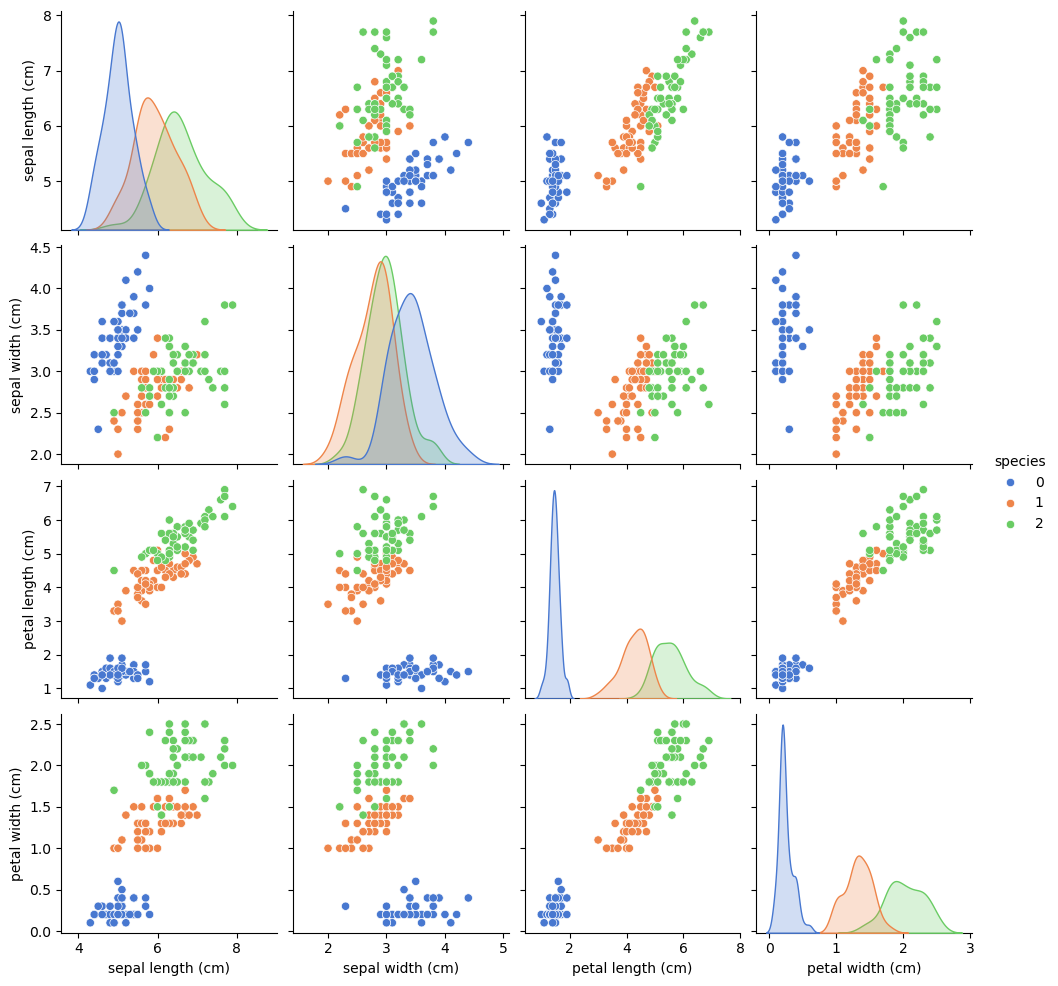

In [6]:
# -----------------------------------
# 시각화
# -----------------------------------
sns.pairplot(data=df_iris, hue="species", palette='muted')
plt.show()

#### 데이터 선택

In [7]:
# ----------------
# X, y
# ----------------
X = df_iris.drop('species', axis=1)
y = df_iris['species']

#### 학습용 데이터와 테스트용 데이터 분할

In [8]:
# ----------------
# 균등분할
#   stratify
# ----------------

from sklearn.model_selection import train_test_split

# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size=0.2
                                                    , random_state=42
                                                    , stratify=y)

# 데이터의 크기 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

(120, 4) (30, 4) (120,) (30,)
species
0    40
2    40
1    40
Name: count, dtype: int64
species
0    10
2    10
1    10
Name: count, dtype: int64


#### 모델 생성

In [9]:
# ---------------------------------------
# DecisionTreeClassifier 모델 생성
# ---------------------------------------
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)



#### GridSearchCv
* 교차검증과 하이퍼파라미터튜닝을 한번에

In [ ]:
# ---------------------------------------
# StratifiedKFold 객체 생성
# ---------------------------------------
from sklearn.model_selection import StratifiedKFold
sfk = StratifiedKFold(n_splits=5)


StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [14]:
# -----------------------------
# 하이퍼파라미터 준비
# -----------------------------
parameters = {
    'max_depth' : [3,4,5],
    'min_samples_split' : [2,4]
}


# -----------------------------
# GridSearchCV 객체 생성
# -----------------------------
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(model, parameters, cv=sfk, refit=True)

# -----------------------------
# 하이퍼파라미터를 순차적으로 변경하면서 학습/평가 수행
# -----------------------------
gscv.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': [3, 4, ...], 'min_samples_split': [2, 4]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [16]:
# -----------------------------
# 그리드서치 결과 확인
# -----------------------------
gscv.cv_results_
pd.DataFrame(gscv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006696,0.004323,0.004252,0.002657,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.916667,0.958333,0.958333,0.916667,0.916667,0.933333,0.020412,3
1,0.001898,0.000963,0.000920,0.000815,3,4,"{'max_depth': 3, 'min_samples_split': 4}",0.916667,0.958333,0.958333,0.916667,0.916667,0.933333,0.020412,3
2,0.001012,0.000310,0.000858,0.000434,4,2,"{'max_depth': 4, 'min_samples_split': 2}",0.916667,0.958333,0.958333,0.958333,0.916667,0.941667,0.020412,1
3,0.001533,0.001139,0.000531,0.000560,4,4,"{'max_depth': 4, 'min_samples_split': 4}",0.916667,0.958333,0.958333,0.916667,0.916667,0.933333,0.020412,3
4,0.001589,0.000525,0.000629,0.000516,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.916667,0.958333,0.958333,0.958333,0.916667,0.941667,0.020412,1
5,0.000757,0.000396,0.000863,0.000446,5,4,"{'max_depth': 5, 'min_samples_split': 4}",0.916667,0.958333,0.958333,0.916667,0.916667,0.933333,0.020412,3


In [17]:
gscv.best_params_

{'max_depth': 4, 'min_samples_split': 2}

In [18]:
gscv.best_score_

np.float64(0.9416666666666668)

In [19]:
# -----------------------------
# 최종모델
# -----------------------------
best_model = gscv.best_estimator_

# -----------------------------
# 최종 테스트
# -----------------------------
best_model.score(X_test, y_test)

0.9333333333333333

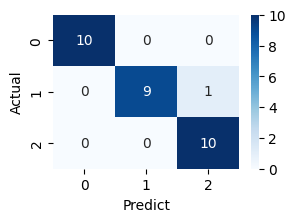

In [ ]:
# --------------------------------
# 혼동행렬 (행=실제, 열=예측)
# --------------------------------
from sklearn.metrics import confusion_matrix
confusion_matrix()

#### 의사결정트리 모델의 학습 결과

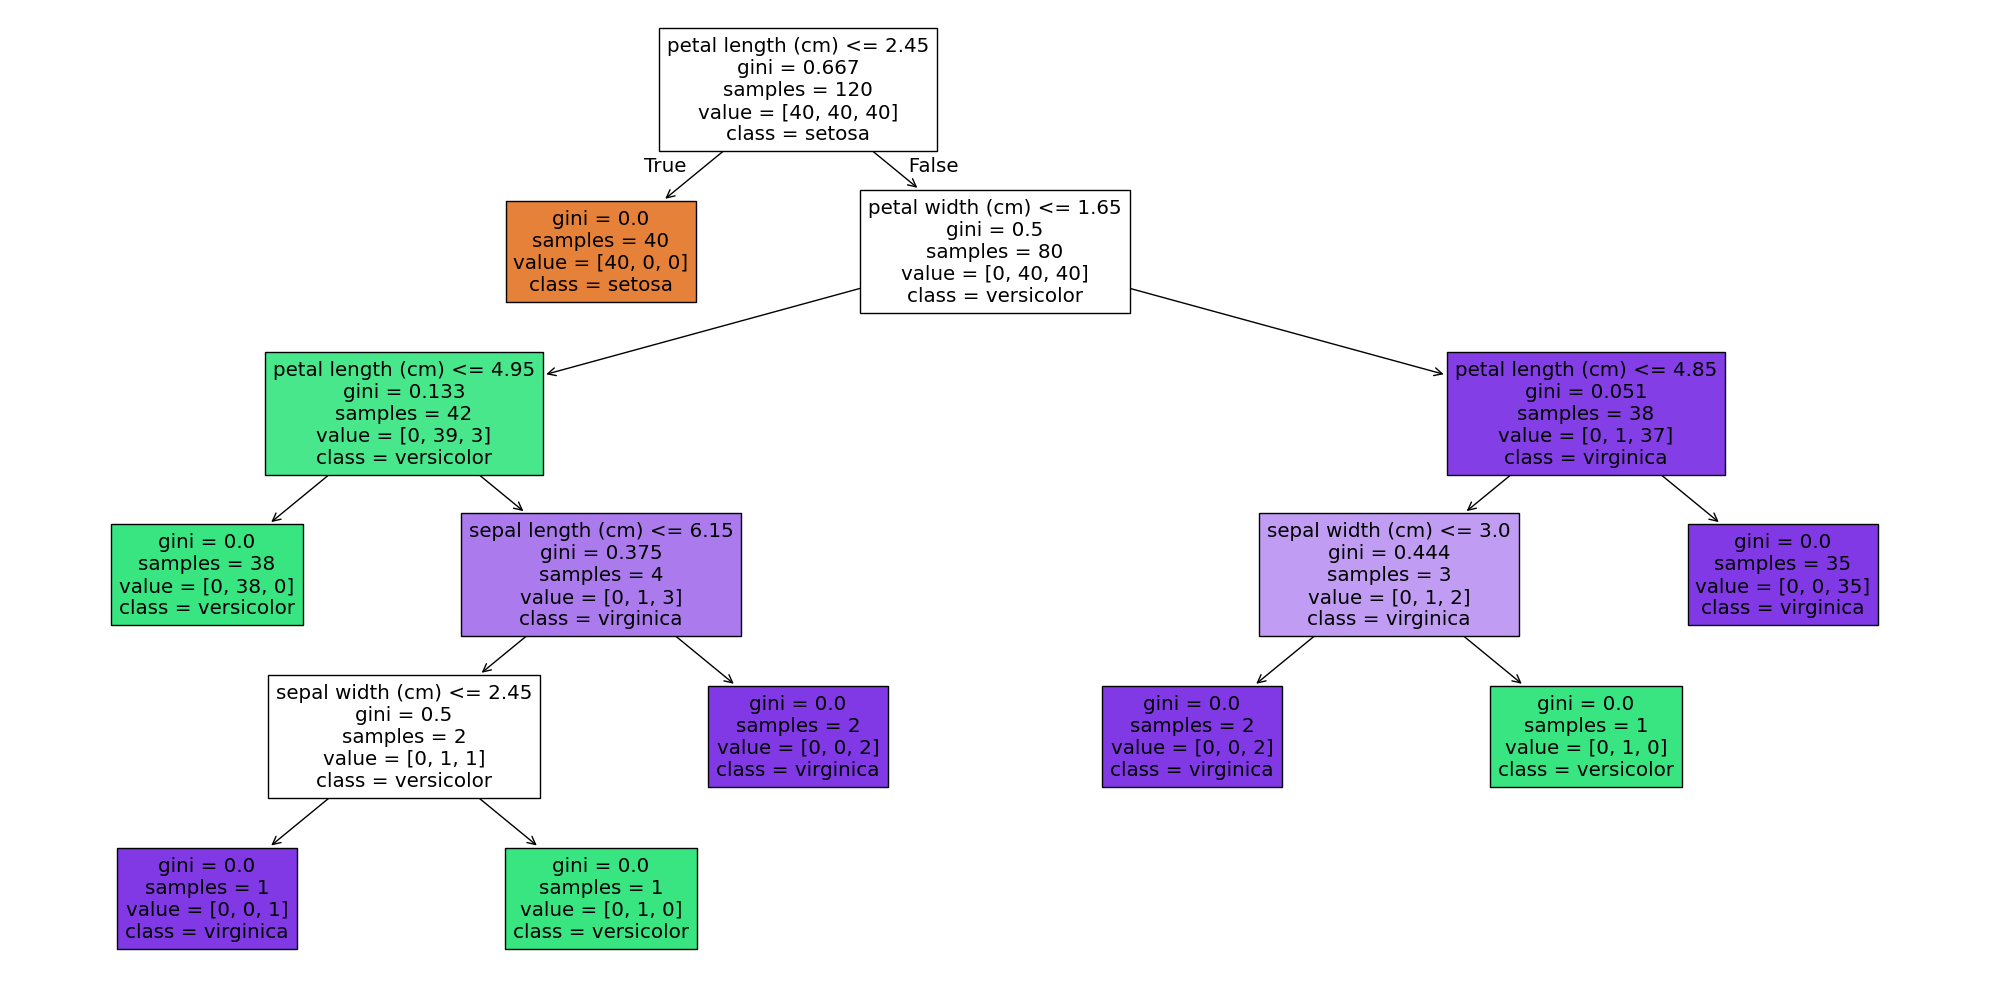

In [ ]:
# 트리 시각화


In [ ]:
# --------------------------
# 트리의 깊이
#   get_depth()
# --------------------------


5


특성의 중요도 >>> [0.00625    0.02916667 0.5585683  0.40601504]


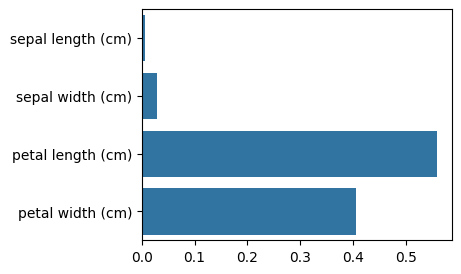

In [ ]:
# --------------------------
# feature_importances_
# --------------------------
